In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'w'
from astropy import log, constants, coordinates, units as u
import warnings
warnings.filterwarnings('ignore')
log.setLevel('ERROR')

# My functions
from mol_model import fetch_cubes, model_and_plot, list_mol_tags, get_cubes_from_mask, plot_mom0s

results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/contsub_smoothed_cubes_K/'

make: *** No targets specified and no makefile found.  Stop.


In [2]:
# Get list of all cubes
import glob
cubefns = glob.glob(f"{results}/source_ab_*.image.commonbeam.contsub.K.fits")

In [3]:
# Set coordinate of central source
crd = coordinates.SkyCoord("17:46:10.6339473267 -28:42:17.9807702398", frame='icrs', unit=(u.h, u.deg))

In [9]:
# Get only the cubes that have our line of interest in them
mol_tag = 41009
cubes, tbl = fetch_cubes(cubefns, catalog='JPL', mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, parse_loc=False, ret_tbl=True)

[<Table length=5>
   FREQ      ERR    LGINT    DR    ELO    GUP   TAG   QNFMT QN'  QN" 
   MHz       MHz   MHz nm2        1 / cm                             
 float64   float64 float64 int64 float64 int64 int64  int64 str3 str3
---------- ------- ------- ----- ------- ----- ------ ----- ---- ----
100490.163    0.09 -3.5849     3 85.2109    22 -41009   202  5 4  4 4
100506.072    0.09 -2.9623     3 50.8652    44 -41009   202  5 3  4 3
100517.433    0.09  -3.094     3 26.3326    22 -41009   202  5 2  4 2
100524.249    0.09 -3.0053     3  11.613    22 -41009   202  5 1  4 1
100526.541    0.09 -2.9773     3  6.7065    22 -41009   202  5 0  4 0, <Table length=5>
   FREQ      ERR    LGINT    DR    ELO    GUP   TAG   QNFMT QN'  QN" 
   MHz       MHz   MHz nm2        1 / cm                             
 float64   float64 float64 int64 float64 int64 int64  int64 str3 str3
---------- ------- ------- ----- ------- ----- ------ ----- ---- ----
100490.163    0.09 -3.5849     3 85.2109    22 -41009 

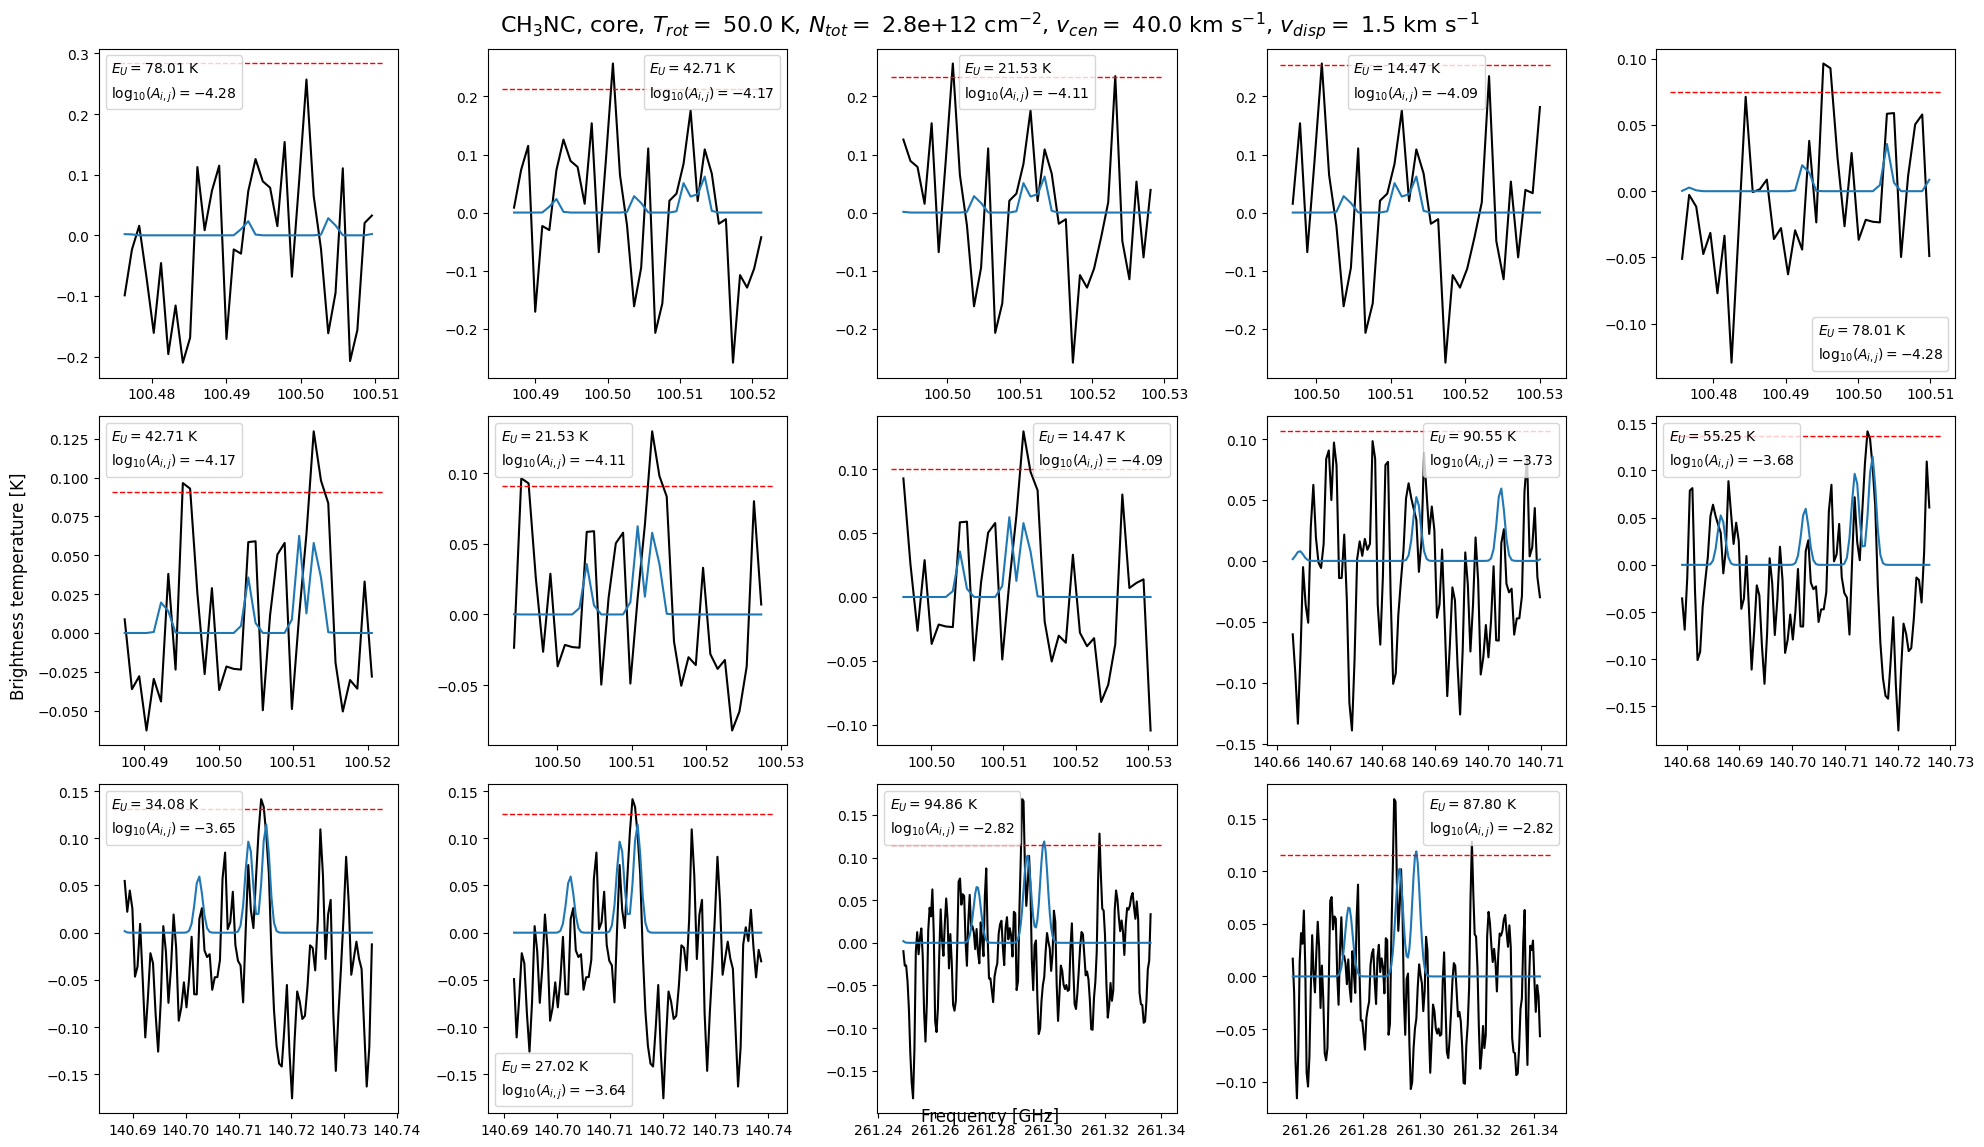

In [26]:
# Generate the model and plot the model and data spectra
model_and_plot(cubes, temp = 50., N_tot = 2.8e+12, v_cen = 40.*u.km/u.s, v_disp = 1.5*u.km/u.s,
               mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='JPL', fig_width=20, fig_height=12,
               nrows=3, ncols=5, parse_loc=False, ret_tbl=False, line_by_line=True, name_for_plot=f'CH$_3$NC', 
               extr_type="coord", crd=crd, show_2_sigma=True)

In [12]:
# Get subcubes based on mask
cubes_masked = get_cubes_from_mask("diffuse_regions.fits", 1, cubes, plot_region=False)

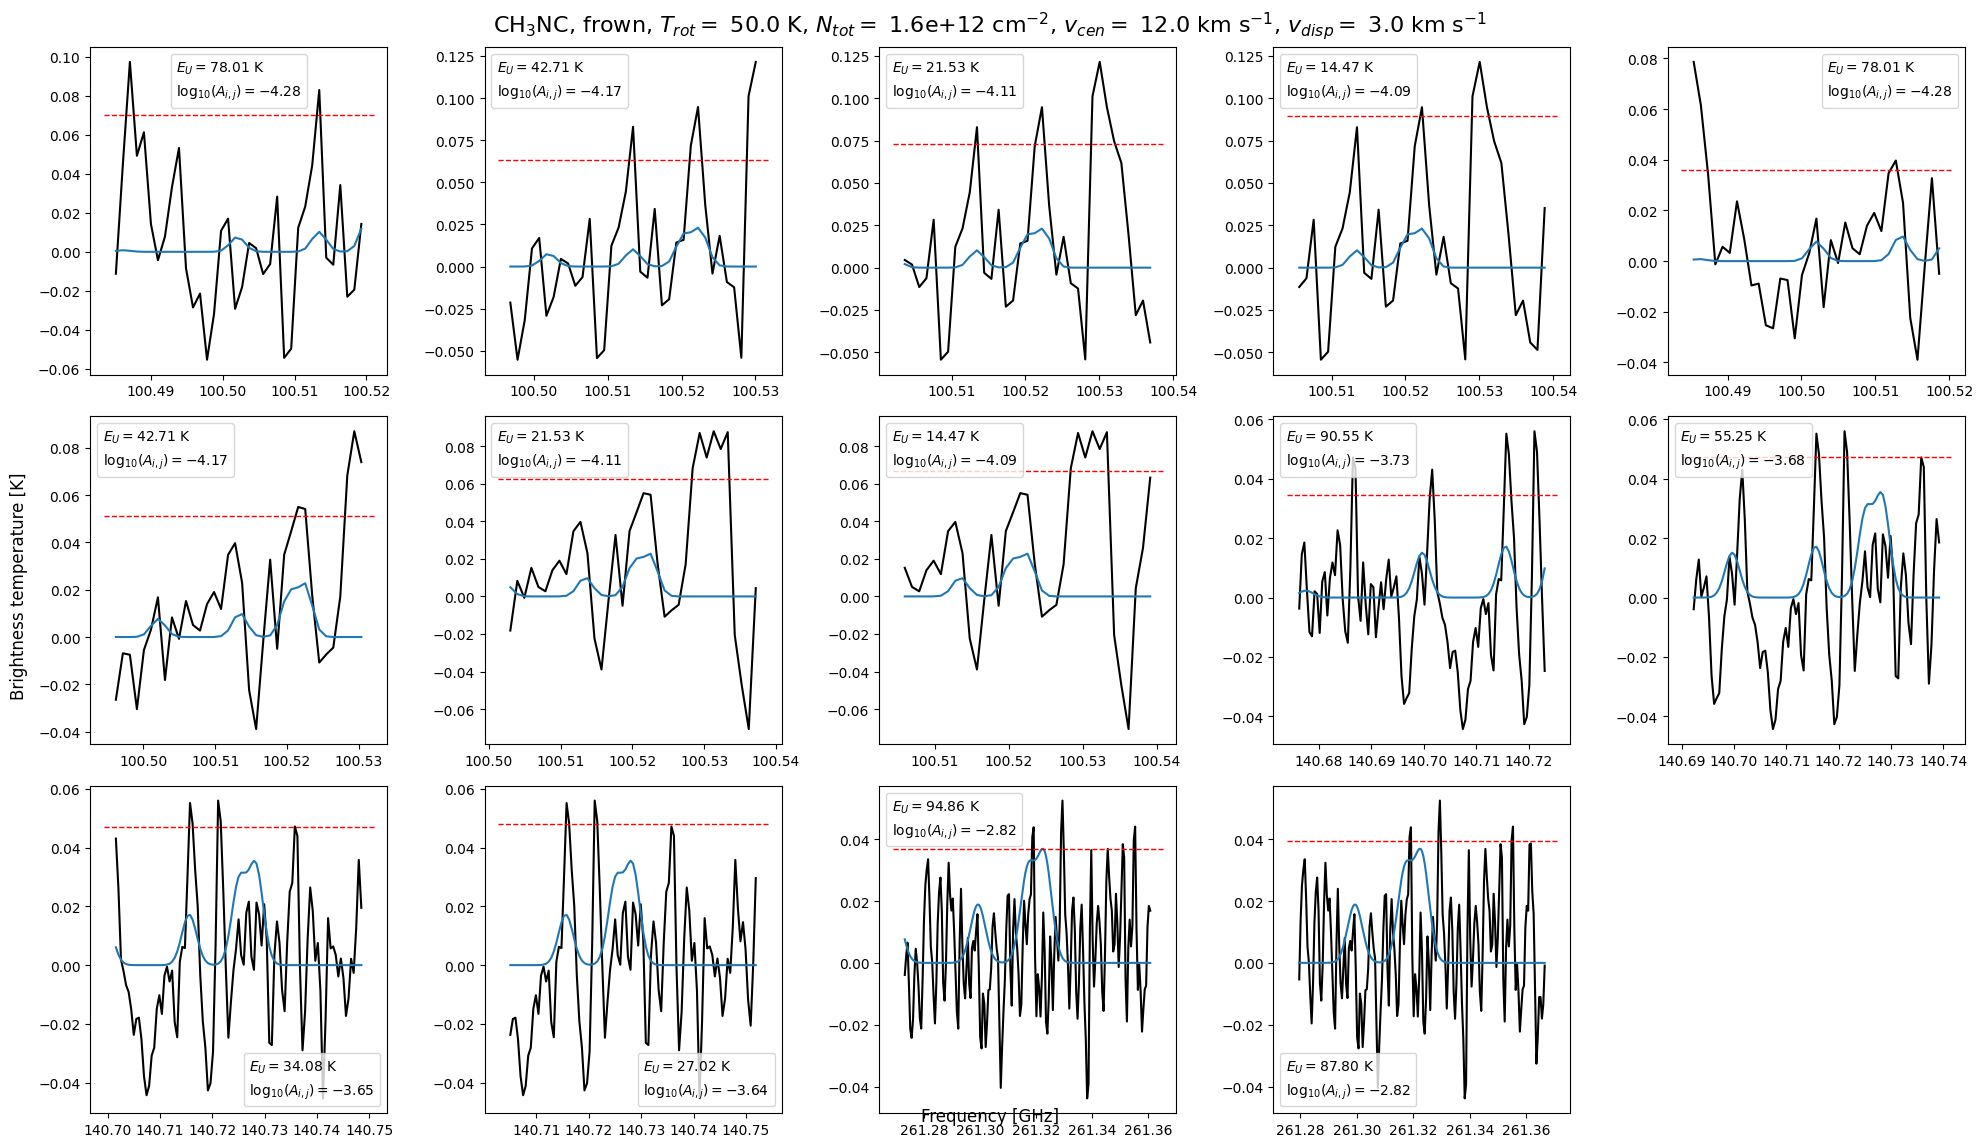

In [31]:
# Generate the model and plot the model and data spectra
freqs = model_and_plot(cubes_masked, temp = 50., N_tot = 1.6e+12, v_cen = 12.*u.km/u.s, v_disp = 3*u.km/u.s,
                       mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='JPL', fig_width=20, fig_height=12, 
                       nrows=3, ncols=5, parse_loc=False, ret_tbl=False, line_by_line=True, name_for_plot=f'CH$_3$NC', 
                       extr_type="reg", just_data=False, show_2_sigma=True, return_freqs=True)

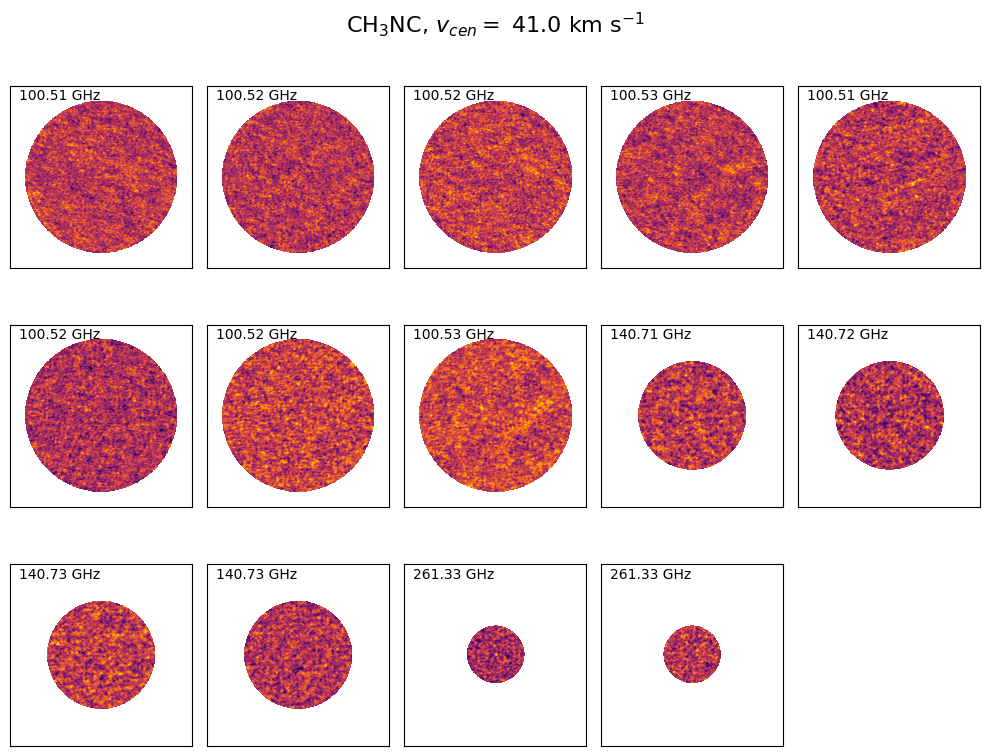

In [18]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=41.*u.km/u.s, fig_width=10, fig_height=8, nrows=3, ncols=5, name_for_plot=f'CH$_3$NC')

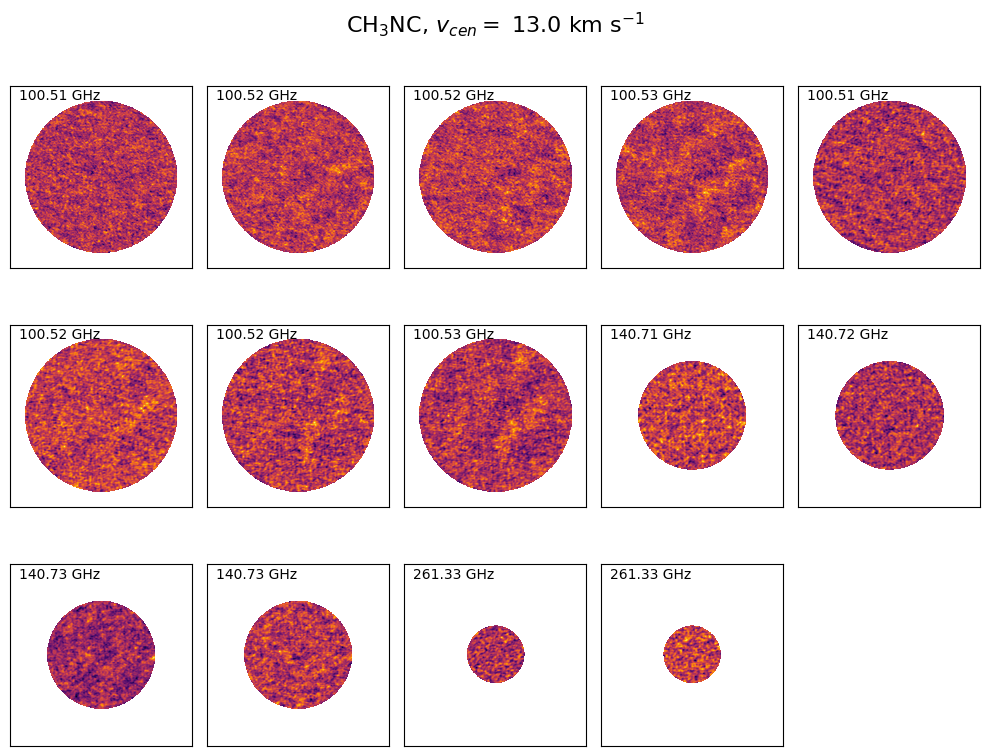

In [19]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=13.*u.km/u.s, fig_width=10, fig_height=8, nrows=3, ncols=5, name_for_plot=f'CH$_3$NC')